# Decision tree for stock market
<sup>By [Ramin Madarshahian](https://www.linkedin.com/in/madarshahian/)
</sup>

Decision trees are organized in a way that most informative feature usually gets to the root if they are sorted using Gini Index and Information Gain. Just for sake of fun, I was curious to see if we consider different stocks and take _S&P 500_ as the responce how the change in stocks would affect the changes in _S&P 500_. Stocks also were simplified to a binary signal, meaning if a stock goes high gets +1 and if goes down gets -1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


To show how data are organized I show an example of it below:

In [2]:
# download dataframe
SPY = pdr.get_data_yahoo("SPY", start="2020-01-01", end="2020-04-28")['Adj Close'].values
SPY_Sign = np.sign(np.diff(SPY))


[*********************100%***********************]  1 of 1 completed


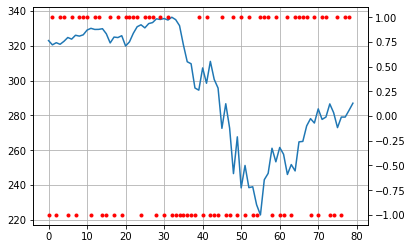

In [3]:
fig,ax1 = plt.subplots()
ax1.plot(SPY)
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(SPY_Sign,'r.');

In the obove figure, the data are shown in the  <font color='red'>red</font> was used in the model.

In [4]:
#%%
stocks_list = ['CRM', 'COP', 'BABA', 'TEAM', 'CVX', 'M', 'PWR', 'MSFT', 'SWN', 'AMZN',\
               'SAP','NFLX', 'SHOP', 'TWTR', 'DAL', 'TNK', 'LUV', 'NICE', 'TRU', \
               'FOSL', 'TGP', 'TTD', 'SQ', 'T', 'NCLH', 'CI', 'OXY', 'WMT', 'DHT', 'USO',\
               'BA', 'FTAI', 'KOS', 'BB', 'MRO', 'SLB', 'SNE', 'LMT', 'AAPL', 'JPM', 'ET', 'TSLA', \
               'INSW', 'FB', 'MUR', 'XOM', 'FRO', 'BP', 'WFC', 'TOT', 'KO', 'NOW']
responce_list= ['SPY']#'QQQ',
hist_input = dict()
for stock in stocks_list:
    h=pdr.get_data_yahoo(stock, start="2017-01-01", end="2020-04-28",progress=False)['Adj Close'].values
    h_diff = np.sign(np.diff(h)+1e-10)
    hist_input.update({stock:h_diff})  
Input_data = pd.DataFrame.from_dict(hist_input)   
Input_data.head()

,CRM,COP,BABA,TEAM,CVX,M,PWR,MSFT,SWN,AMZN,...,INSW,FB,MUR,XOM,FRO,BP,WFC,TOT,KO,NOW
0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
1,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0


In [5]:
#responce
o = pdr.get_data_yahoo(responce_list[0], start="2017-01-01", end="2020-04-28",progress=False)['Adj Close'].values
o_sign = np.sign(np.diff(o)+1e-10)#This small number is added to avois zero

In [6]:
#Randomizing the data:
Input_data = pd.DataFrame.from_dict(hist_input)  
index = np.random.choice(len(Input_data)-1,len(Input_data)-1,replace=False)
randomize_input = Input_data.iloc[index,:]
randomize_output = o_sign[index]

In [7]:
#%%
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
clf = clf.fit(randomize_input, randomize_output)
CV = cross_val_score(clf, randomize_input, randomize_output, cv=10)

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


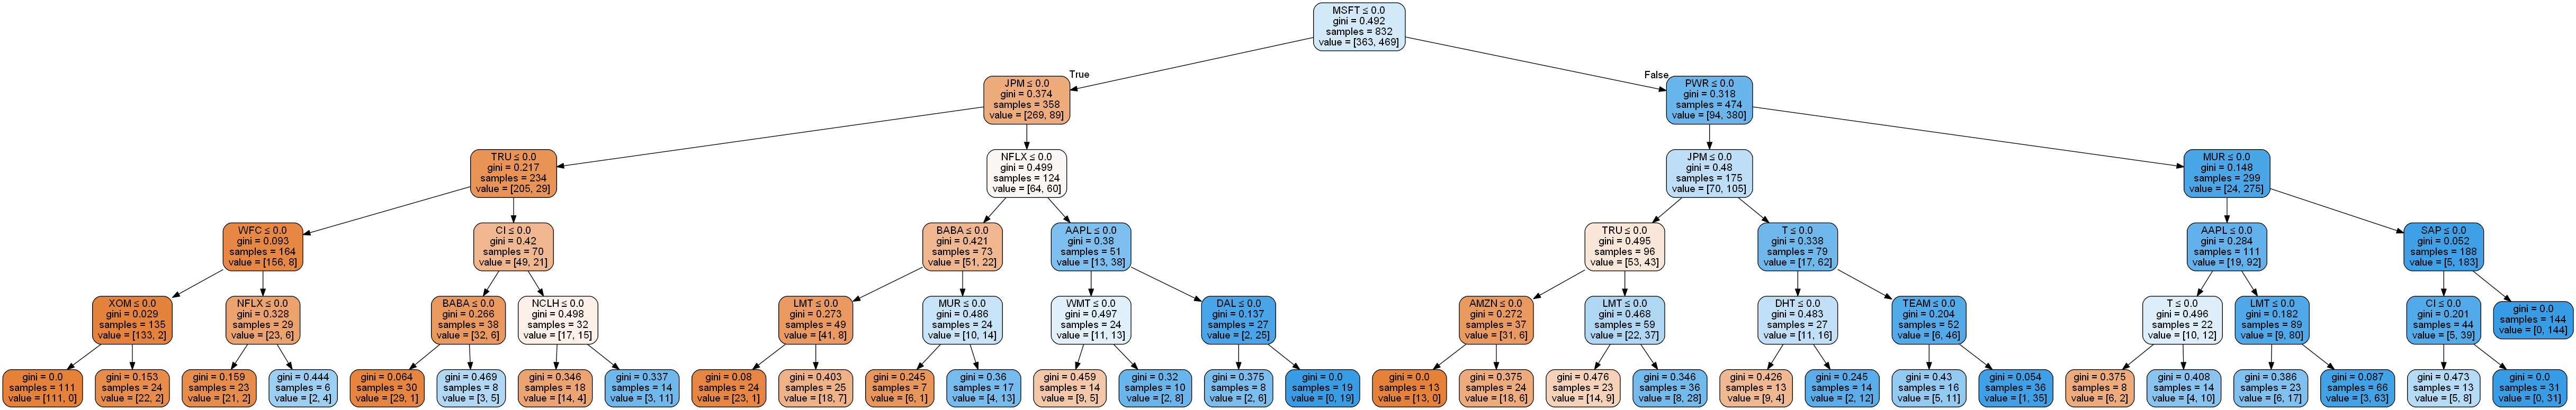

<Figure size 432x288 with 0 Axes>

In [8]:
#%%
#tree.plot_tree(clf,feature_names= stocks_lists)
import os 
os.environ["PATH"] += os.pathsep + r'C:\ProgramData\Anaconda3\envs\tf_gpu\Library\bin\graphviz'

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,feature_names = stocks_list,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
plt.figure()
Image(graph.create_png())

In [9]:
graph.write_pdf("tree.pdf")

True

# Concluding remark
Reuslts imply the importance of microsoft in overall market. Of course this code was only a fun game with stock and it is not designed for prediction.